# Flair Transcript Quantification Results Analysis (used GENCODE v26 as annotation file)

This notebook analyzed FLAIR transcript quantification results generated from my own pipeline.

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline
import seaborn as sns
import re
from IPython.display import display
from matplotlib.pyplot import gcf
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making
import scipy.spatial as sp, scipy.cluster.hierarchy as hc #for faster computing of hierarchial clusters

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pd.options.display.max_columns = None #display all columns in dataframe

In [ ]:
#pd.options.display.max_colwidth = 100 #show the full content of long strings

### Import Data

In [3]:
os.getcwd()

'C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research\\gtex_v9_data_analysis\\FLAIR\\work_in_progress'

In [4]:
# change working directory
os.chdir('C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research')

In [5]:
data_dir = 'gtex_v9_data\\data_for_analysis\\my_flair_data'

In [6]:
flair_quant_results_file_path = os.path.join(data_dir, 'flair_quantify_raw_counts.tsv')

#### Flair Transcript Quantification Data (in raw counts)

In [7]:
flair_quant_data = pd.read_csv(flair_quant_results_file_path, sep='\t')

In [8]:
flair_quant_data.head(5)

,ID,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS-rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV-rep,GTEX-ZT9X-1826-SM-4V2KV-rep2,GTEX-ZVZP-0226-SM-4VEIO,K562-ampure,K562-ampure-70ng,K562-extrawash,K562-extrawashwarm
0,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:2056...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:8881...,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:742...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:3651...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00005686-938b-4d3f-b5d1-89c0dd85a662_chr2:7631...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
flair_quant_data.shape

(1329742, 93)

In [10]:
print(flair_quant_data.isnull().values.sum()) # check total number of missing values

0


In [11]:
# rename first column name
flair_quant_data = flair_quant_data.rename(columns={'ID': 'transcript'})

In [12]:
len(np.unique(flair_quant_data.transcript))

1329742

In [13]:
# remove rows that have NaN values
flair_quant_data = flair_quant_data.dropna()

In [14]:
flair_quant_data.shape

(1329742, 93)

In [15]:
# rename some of the sample id names to match with other information tables
flair_quant_data = flair_quant_data.rename(columns={'GTEX-13QJ3-0726-SM-7LDHS-rep': 'GTEX-13QJ3-0726-SM-7LDHS_rep',
                                                   'GTEX-14BMU-0526-SM-5CA2F-rep':'GTEX-14BMU-0526-SM-5CA2F_rep',
                                                   'GTEX-14BMU-0526-SM-5CA2F-rep2':'GTEX-14BMU-0526-SM-5CA2F_rep2',
                                                   'GTEX-1GN1W-0226-SM-7AGLJ-rep':'GTEX-1GN1W-0226-SM-7AGLJ_rep',
                                                   'GTEX-Q2AG-0011-R11A-SM-2EBL2-rep':'GTEX-Q2AG-0011-R11A-SM-2EBL2_rep',
                                                   'GTEX-Q2AG-0011-R11A-SM-2EBL2-rep2':'GTEX-Q2AG-0011-R11A-SM-2EBL2_rep2',
                                                   'GTEX-RWS6-0008-SM-3QHWG-direct':'GTEX-RWS6-0008-SM-3QHWG_direct',
                                                   'GTEX-R55E-0008-SM-3QNG3-direct':'GTEX-R55E-0008-SM-3QNG3_direct',
                                                   'GTEX-RWS6-0008-SM-3QHWG-rep':'GTEX-RWS6-0008-SM-3QHWG_rep',
                                                   'GTEX-WY7C-1126-SM-3GS2X-rep':'GTEX-WY7C-1126-SM-3GS2X_rep',
                                                   'GTEX-WY7C-1126-SM-3GS2X-rep2':'GTEX-WY7C-1126-SM-3GS2X_rep2',
                                                   'GTEX-Y5LM-0426-SM-3YX99-rep':'GTEX-Y5LM-0426-SM-3YX99_rep',
                                                   'GTEX-Y5LM-0426-SM-3YX99-rep2':'GTEX-Y5LM-0426-SM-3YX99_rep2',
                                                   'GTEX-ZT9X-1826-SM-4V2KV-rep':'GTEX-ZT9X-1826-SM-4V2KV_rep',
                                                   'GTEX-ZT9X-1826-SM-4V2KV-rep2':'GTEX-ZT9X-1826-SM-4V2KV_rep2',
                                                    'K562-ampure':'K562_ampure',
                                                    'K562-ampure-70ng':'K562_ampure_70ng',
                                                    'K562-extrawash':'K562_extrawash',
                                                    'K562-extrawashwarm':'K562_extrawashwarm',
                                                    'GTEX-QEG5-0008-SM-3QHW2-ctrl':'GTEX-QEG5-0008-SM-3QHW2_ctrl',
                                                    'GTEX-QEG5-0008-SM-3QHW2-exp':'GTEX-QEG5-0008-SM-3QHW2_exp',
                                                    'GTEX-QV44-0008-SM-3QNG7-ctrl1':'GTEX-QV44-0008-SM-3QNG7_ctrl1',
                                                    'GTEX-QV44-0008-SM-3QNG7-ctrl2':'GTEX-QV44-0008-SM-3QNG7_ctrl2',
                                                    'GTEX-QV44-0008-SM-3QNG7-exp':'GTEX-QV44-0008-SM-3QNG7_exp',
                                                    'GTEX-S4Z8-0008-SM-2Y983-ctrl':'GTEX-S4Z8-0008-SM-2Y983_ctrl',
                                                    'GTEX-S4Z8-0008-SM-2Y983-exp1':'GTEX-S4Z8-0008-SM-2Y983_exp1',
                                                    'GTEX-S4Z8-0008-SM-2Y983-exp2':'GTEX-S4Z8-0008-SM-2Y983_exp2',
                                                    'GTEX-S95S-0008-SM-3RQ8B-ctrl':'GTEX-S95S-0008-SM-3RQ8B_ctrl',
                                                    'GTEX-S95S-0008-SM-3RQ8B-exp1':'GTEX-S95S-0008-SM-3RQ8B_exp1',
                                                    'GTEX-S95S-0008-SM-3RQ8B-exp2':'GTEX-S95S-0008-SM-3RQ8B_exp2',
                                                    'GTEX-WY7C-0008-SM-3NZB5-ctrl':'GTEX-WY7C-0008-SM-3NZB5_ctrl',
                                                    'GTEX-WY7C-0008-SM-3NZB5-exp':'GTEX-WY7C-0008-SM-3NZB5_exp'
                                                   })

In [16]:
flair_quant_data.head(5)

,transcript,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,GTEX-13RTJ-0011-R7b-SM-5CTCB,...,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
0,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:2056...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:8881...,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:742...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:3651...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00005686-938b-4d3f-b5d1-89c0dd85a662_chr2:7631...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Complete Sample Information (Supplementary Table 1)

Samples sequencing metadata

In [17]:
data_dir2 = 'gtex_v9_data\\data_for_analysis\\gtex_database_data'

In [18]:
sample_info_path = os.path.join(data_dir2, 'sample_info_complete.csv')

In [19]:
sample_info = pd.read_csv(sample_info_path)

In [20]:
sample_info.head(5)

,sample_id,date_of_sequencing,sample_name,tissue,protocol,mrna_rin,flush_buffer,amount_loaded_ng,run_time,total_reads,median_read_length,median_read_quality,aligned_reads,median_read_length_align,median_read_quality_aligned,WGS,data_center,RNA_extraction_method,3_prime_bias_median,3_prime_bias_sd
0,LV1681,53119,CVD-LV1681,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,2287307,195,9.9,620717,696,10.9,No,BROAD,RNA Extraction from Paxgene-derived Lysate Pla...,0.653,0.378
1,LV1702,53119,CVD-LV1702,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,4456040,211,10.3,1517665,737,11.5,No,BROAD,RNA Extraction from Paxgene-derived Lysate Pla...,0.754,0.357
2,LV1708,60319,CVD-LV1708,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,2586875,261,10.5,1117070,699,11.2,No,BROAD,RNA Extraction from Paxgene-derived Lysate Pla...,0.659,0.382
3,LV1723,60319,CVD-LV1723,Heart - Left Ventricle,cDNA-PCR,NaN,PBT,60.0,48.0,3577244,230,10.5,1017015,666,11.5,No,BROAD,RNA Extraction from Paxgene-derived Lysate Pla...,0.570,0.399
4,GTEX-1192X-0011-R10a-SM-4RXXZ,52219,GTEX-1192X,Brain - Frontal Cortex (BA9),cDNA-PCR,8.7,PBT,60.0,48.0,7568902,651,11.4,5593813,750,11.8,Yes,BROAD,RNA isolation_PAXgene Tissue miRNA,0.782,0.348


In [21]:
sample_info.shape

(96, 20)

#### Transcript Length Table

In [22]:
transcript_length_file_path = os.path.join(data_dir, 'gencode26_transcript_length_df.csv')
transcript_length_df = pd.read_csv(transcript_length_file_path)
transcript_length_df.head(3)

,Unnamed: 0,isoform,gene,length,composite_id
0,0,123d6ced-595a-4042-a667-96ae3ece5471,chr1:11000,2541,123d6ced-595a-4042-a667-96ae3ece5471_chr1:11000
1,1,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a,chr1:14000,1770,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a_chr1:14000
2,2,6033210c-c373-46ef-acb8-f1e1cbdc2c3e,chr1:14000,1989,6033210c-c373-46ef-acb8-f1e1cbdc2c3e_chr1:14000


In [23]:
transcript_length_clean_df = transcript_length_df[['composite_id','length']]
transcript_length_clean_df.head(3)

,composite_id,length
0,123d6ced-595a-4042-a667-96ae3ece5471_chr1:11000,2541
1,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a_chr1:14000,1770
2,6033210c-c373-46ef-acb8-f1e1cbdc2c3e_chr1:14000,1989


## Part 2: Data Cleaning and Manipulation

### Section 1: Merge transcript quantification raw counts dataframe with the transcript length table

In [24]:
transcript_counts_with_length_df = flair_quant_data.merge(transcript_length_clean_df,how='inner',
                                                                         left_on='transcript',right_on='composite_id')

In [25]:
if transcript_counts_with_length_df.isna().values.any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [26]:
transcript_counts_with_length_df.shape

(1329735, 95)

In [27]:
# shift column 'length' to second position
length_column = transcript_counts_with_length_df.pop('length')
transcript_counts_with_length_df.insert(1, 'transcript_length', length_column)
# Delete the last column
transcript_counts_with_length_df = transcript_counts_with_length_df.drop(transcript_counts_with_length_df.columns[-1], axis=1)

In [28]:
transcript_counts_with_length_df.head(3)

,transcript,transcript_length,GTEX-1192X-0011-R10a-SM-4RXXZ,GTEX-11H98-0011-R11b-SM-4SFLZ,GTEX-11TTK-0011-R7b-SM-4TVFS,GTEX-1211K-0826-SM-7LDFQ,GTEX-1313W-0011-R7b-SM-4ZL3U,GTEX-13QBU-0426-SM-5A4VT,GTEX-13QJ3-0726-SM-7LDHS,GTEX-13QJ3-0726-SM-7LDHS_rep,...,GTEX-ZPU1-0826-SM-4UJSC,GTEX-ZT9X-0326-SM-4U9QG,GTEX-ZT9X-1826-SM-4V2KV,GTEX-ZT9X-1826-SM-4V2KV_rep,GTEX-ZT9X-1826-SM-4V2KV_rep2,GTEX-ZVZP-0226-SM-4VEIO,K562_ampure,K562_ampure_70ng,K562_extrawash,K562_extrawashwarm
0,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:2056...,2368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:8881...,466,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:742...,368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Section 2: Counts to TPM Conversion

In [29]:
# Define the function to calculate TPM
def calculate_tpm(counts, length):
    return (counts / length) / ((counts.sum()/length)/1000000)

# Apply the function to each cell of the dataframe
transcript_TPM_df = transcript_counts_with_length_df[transcript_counts_with_length_df.\
                    columns[2:]].apply(lambda x: calculate_tpm(x, transcript_counts_with_length_df['transcript_length']))

In [30]:
# add transcript ID column
transcript_TPM_with_ID_df = pd.concat([transcript_TPM_df, transcript_counts_with_length_df['transcript']], axis=1)

In [31]:
# shift column 'transcript' to first position
transcript_id_column = transcript_TPM_with_ID_df.pop('transcript')
transcript_TPM_with_ID_df.insert(0, 'transcript', transcript_id_column)

In [32]:
transcript_TPM_with_ID_df.shape

(1329735, 93)

In [ ]:
#transcript_TPM_with_ID_df.head(3)

#### TPM Conversion Results Check

#### For each column (sample), the TPM values should add up to 1,000,000

In [33]:
tpm_sum_by_column =transcript_TPM_with_ID_df[transcript_TPM_with_ID_df.columns[1:]].apply(lambda x: x.sum()).tolist()

In [34]:
check_tpm_sum_by_column_result = sum(abs(value-1000000)<0.01 for value in tpm_sum_by_column)

In [35]:
check_tpm_sum_by_column_result

92

### Section 3: Make Separate Dataframes for Novel and Annotated Transcripts

### (1) Dataframe of Novel Transcripts

In [36]:
transcript_TPM_with_ID_df['transcript_type'] = transcript_TPM_with_ID_df['transcript'].apply(lambda x: x[0])
transcript_TPM_with_ID_df['novel_or_annot'] = transcript_TPM_with_ID_df['transcript_type'].apply(lambda x: 'annot' if x=='E' else 'novel')

In [37]:
transcript_TPM_with_ID_df['transcript'].groupby(transcript_TPM_with_ID_df['novel_or_annot']).count()

novel_or_annot
annot      50300
novel    1279435
Name: transcript, dtype: int64

In [38]:
flair_novel_transcript_quant_data = transcript_TPM_with_ID_df[transcript_TPM_with_ID_df.novel_or_annot=='novel']

In [39]:
flair_novel_transcript_quant_data.shape

(1279435, 95)

#### Transpose the dataframe

In [40]:
novel_transcript_quant_transposed = flair_novel_transcript_quant_data.transpose().reset_index()

#### Replace the header

In [41]:
novel_transcript_quant_header = novel_transcript_quant_transposed.iloc[0] #grab the first row for the header
novel_transcript_quant_transposed = novel_transcript_quant_transposed[1:] #remove first row from dataset
novel_transcript_quant_transposed.columns = novel_transcript_quant_header #set the new header row

#### Rename first column

In [42]:
novel_transcript_quant_transposed = novel_transcript_quant_transposed.rename(columns = {"transcript":"sample_id"})

**Drop last two rows**

In [43]:
novel_transcript_quant_transposed.drop(novel_transcript_quant_transposed.tail(2).index,inplace=True)

In [44]:
novel_transcript_quant_transposed.shape

(92, 1279436)

In [46]:
novel_transcript_quant_transposed.tail(3)

,sample_id,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:205693000,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:88815000,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:7425000,00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:36514000,00005686-938b-4d3f-b5d1-89c0dd85a662_chr2:76310000,0000584b-c2d2-462f-a5fa-8a79a5018abe_ENSG00000204843.12,00005a34-cb5d-4ff6-9a14-c5053bea9074_chr3:129386000,00005b31-7f03-4dae-9af1-7ecfe25f29a4_chr18:61397000,00005c7b-11c0-4d1e-9fe4-709f78621604_chr15:76295000,...,ffff8d6b-d04a-4e1e-aa2e-59af3705657e_ENSG00000197568.13,ffff9953-3e60-4c3f-b94f-281f7bbf7433_chr4:53218000,ffffa7f5-ccd9-469c-8072-baa3e747e21b_chr10:114810000,ffffa9ff-9082-4901-aa52-800c2c951bf7_ENSG00000117448.13,ffffab0e-0b32-45e3-95e8-54ceaed8c610_chr3:111922000,ffffb9b7-2fab-4f0f-90df-6b7240e95f27_chr9:94254000,ffffd3a1-d3ba-43e8-9dfd-84622b4dd449_chr9:127957000,ffffd8fe-45a2-4827-b77b-ca28b228aa18_chr18:35143000,ffffe287-7977-496d-bfa7-fe464a811e5d_chr3:62243000,fffffcf6-6d84-440b-97f0-bcbf42175b5f_chr2:19878000
90,K562_ampure_70ng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.418923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,K562_extrawash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.761101,0.0,0.0,0.0
92,K562_extrawashwarm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.493476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (2) Dataframe of Annotated Transcripts

In [47]:
flair_annotated_transcript_quant_data = transcript_TPM_with_ID_df[transcript_TPM_with_ID_df.novel_or_annot=='annot']
flair_annotated_transcript_quant_data.shape

(50300, 95)

In [48]:
annotated_transcript_quant_transposed = flair_annotated_transcript_quant_data.transpose().reset_index()
annotated_transcript_quant_header = annotated_transcript_quant_transposed.iloc[0] #grab the first row for the header
annotated_transcript_quant_transposed = annotated_transcript_quant_transposed[1:] #remove first row from dataset
annotated_transcript_quant_transposed.columns = annotated_transcript_quant_header #set the new header row
annotated_transcript_quant_transposed = annotated_transcript_quant_transposed.rename(columns = {"transcript":"sample_id"})
annotated_transcript_quant_transposed.drop(annotated_transcript_quant_transposed.tail(2).index,inplace=True)

In [49]:
annotated_transcript_quant_transposed.shape

(92, 50301)

In [50]:
annotated_transcript_quant_transposed.tail(3)

,sample_id,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000000442.10_ENSG00000173153.13,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8-1_ENSG00000003509.15,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,...,ENST00000640965.1_ENSG00000082212.12,ENST00000640967.1_ENSG00000082212.12,ENST00000640979.1_ENSG00000266173.6,ENST00000640983.1_ENSG00000240520.6,ENST00000640985.1_ENSG00000113327.15,ENST00000640986.1_ENSG00000124155.17,ENST00000640989.1_ENSG00000213071.11,ENST00000640992.1_ENSG00000115525.17,ENST00000640996.1_ENSG00000124155.17,ENST00000640998.1_ENSG00000116171.17
90,K562_ampure_70ng,144.96232,8.205414,0.0,7.52163,0.0,0.0,1.367569,19.829751,0.0,...,0.0,1.367569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,K562_extrawash,128.626076,5.327707,0.0,6.849909,0.0,0.0,0.0,16.744223,1.522202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,K562_extrawashwarm,116.491109,4.480427,0.0,2.986952,0.0,0.0,0.746738,11.201068,1.493476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (3) Dataframe of Sample Id's and Sample Tissue Type

Select only sample id's and tissue type columns from the sample info data table.

In [51]:
sample_id_tissue = sample_info[['sample_id','tissue']]
sample_id_tissue.head(5)

,sample_id,tissue
0,LV1681,Heart - Left Ventricle
1,LV1702,Heart - Left Ventricle
2,LV1708,Heart - Left Ventricle
3,LV1723,Heart - Left Ventricle
4,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9)


### Section 4: Merge novel transcript quant data table with tissue type information.

In [52]:
novel_transcript_express_tissue = novel_transcript_quant_transposed.merge(sample_id_tissue,how='left',
                                                                         left_on='sample_id',right_on='sample_id')

In [53]:
#novel_transcript_express_tissue.head(5)

In [54]:
novel_transcript_express_tissue.shape

(92, 1279437)

In [55]:
# shift column 'tissue' to second position
novel_tissue_column = novel_transcript_express_tissue.pop('tissue')
novel_transcript_express_tissue.insert(1, 'tissue', novel_tissue_column)
#novel_transcript_express_tissue.head(3)

### Section 5: Merge annotated transcript quant data table with tissue type information.

In [56]:
annotated_transcript_express_tissue = annotated_transcript_quant_transposed.merge(sample_id_tissue,how='left',
                                                                         left_on='sample_id',right_on='sample_id')
# shift column 'tissue' to second position
annotated_tissue_column = annotated_transcript_express_tissue.pop('tissue')
annotated_transcript_express_tissue.insert(1, 'tissue', annotated_tissue_column)

In [57]:
#annotated_transcript_express_tissue.head(3)

### Section 6: Further Data Cleaning

In [58]:
novel_transcript_express_tissue_clean = novel_transcript_express_tissue[~novel_transcript_express_tissue['tissue']\
                                                                        .isin(['K562'])]

In [59]:
novel_transcript_express_tissue_clean.shape

(88, 1279437)

In [60]:
annotated_transcript_express_tissue_clean = annotated_transcript_express_tissue[~annotated_transcript_express_tissue['tissue']\
                                                                        .isin(['K562'])]

In [61]:
annotated_transcript_express_tissue_clean.shape

(88, 50302)

In [62]:
novel_transcript_express_tissue_clean.head(3)

,sample_id,tissue,00002087-5868-404d-a65c-4ee5e8c938b8_chr2:205693000,00002b37-a995-4eb9-a0f5-e11db9eba4a8_chr1:88815000,00004689-20ea-42f2-b152-3ba842eaf08d_chr19:7425000,00004ead-9f40-4f5a-b121-f26ec4c3dacf_chr2:36514000,00005686-938b-4d3f-b5d1-89c0dd85a662_chr2:76310000,0000584b-c2d2-462f-a5fa-8a79a5018abe_ENSG00000204843.12,00005a34-cb5d-4ff6-9a14-c5053bea9074_chr3:129386000,00005b31-7f03-4dae-9af1-7ecfe25f29a4_chr18:61397000,...,ffff8d6b-d04a-4e1e-aa2e-59af3705657e_ENSG00000197568.13,ffff9953-3e60-4c3f-b94f-281f7bbf7433_chr4:53218000,ffffa7f5-ccd9-469c-8072-baa3e747e21b_chr10:114810000,ffffa9ff-9082-4901-aa52-800c2c951bf7_ENSG00000117448.13,ffffab0e-0b32-45e3-95e8-54ceaed8c610_chr3:111922000,ffffb9b7-2fab-4f0f-90df-6b7240e95f27_chr9:94254000,ffffd3a1-d3ba-43e8-9dfd-84622b4dd449_chr9:127957000,ffffd8fe-45a2-4827-b77b-ca28b228aa18_chr18:35143000,ffffe287-7977-496d-bfa7-fe464a811e5d_chr3:62243000,fffffcf6-6d84-440b-97f0-bcbf42175b5f_chr2:19878000
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),0.0,0.310055,0.0,0.0,0.0,0.0,0.0,0.0,...,0.930164,0.0,0.0,0.0,0.0,0.0,0.0,1.550274,0.0,0.0
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,0.0,1.127877,0.0,0.0,0.0,0.0,0.0,0.0,...,1.579028,0.225575,0.0,0.0,0.0,0.0,0.0,0.676726,0.0,0.0
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.122953,0.0,0.0,0.0,0.0,0.624591,0.0,0.624591,0.0,0.0


In [63]:
annotated_transcript_express_tissue_clean.head(3)

,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000000442.10_ENSG00000173153.13,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8-1_ENSG00000003509.15,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,...,ENST00000640965.1_ENSG00000082212.12,ENST00000640967.1_ENSG00000082212.12,ENST00000640979.1_ENSG00000266173.6,ENST00000640983.1_ENSG00000240520.6,ENST00000640985.1_ENSG00000113327.15,ENST00000640986.1_ENSG00000124155.17,ENST00000640989.1_ENSG00000213071.11,ENST00000640992.1_ENSG00000115525.17,ENST00000640996.1_ENSG00000124155.17,ENST00000640998.1_ENSG00000116171.17
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),265.09688,14.572577,0.0,8.37148,0.0,0.0,1.550274,1.550274,...,0.0,0.62011,0.0,0.0,0.0,0.0,0.0,0.310055,0.0,0.0
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,257.156044,12.181076,0.225575,8.346293,0.225575,0.0,0.225575,1.353453,...,0.225575,0.225575,0.225575,0.0,0.225575,0.0,0.0,0.0,0.0,0.225575
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),132.413187,5.621315,0.0,1.873772,0.0,0.0,0.624591,3.122953,...,0.0,0.0,0.0,1.873772,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
num_novel_transcripts = novel_transcript_express_tissue_clean.shape[1]-2
print("Number of Novel Transcripts: ", num_novel_transcripts)

Number of Novel Transcripts:  1279435


In [65]:
num_annotated_transcripts = annotated_transcript_express_tissue_clean.shape[1]-2
print("Number of Annotated Transcripts: ", num_annotated_transcripts)

Number of Annotated Transcripts:  50300


## Part 3: TPM Filtering

In [66]:
def transcript_filter(df,TPM_threshold,sample_count_min):
    selected_col = df[df.columns.difference(['sample_id', 'tissue'])]
    mask = selected_col > TPM_threshold
    column_counts = mask.sum(axis=0)
    columns_to_keep = column_counts[column_counts >= sample_count_min].index
    df_filtered = df[columns_to_keep]
    df_filtered['sample_id'] = df['sample_id']
    df_filtered['tissue'] = df['tissue']
    # shift column 'sample_id' to first position
    id_column = df_filtered.pop('sample_id')
    df_filtered.insert(0, 'sample_id', id_column)
    # shift column 'tissue' to second position
    tissue_column = df_filtered.pop('tissue')
    df_filtered.insert(1, 'tissue', tissue_column)
    return df_filtered

In [67]:
novel_transcript_express_tissue_clean_filtered = transcript_filter(novel_transcript_express_tissue_clean,5,3)

In [68]:
num_novel_filtered_transcripts = novel_transcript_express_tissue_clean_filtered.shape[1]-2
print("Number of Novel Filtered Transcripts: ", num_novel_filtered_transcripts)

Number of Novel Filtered Transcripts:  34848


In [69]:
annotated_transcript_express_tissue_clean_filtered = transcript_filter(annotated_transcript_express_tissue_clean,5,3)

In [70]:
num_annotated_filtered_transcripts = annotated_transcript_express_tissue_clean_filtered.shape[1]-2
print("Number of Annotated Filtered Transcripts: ", num_annotated_filtered_transcripts)

Number of Annotated Filtered Transcripts:  12887


In [73]:
novel_transcript_express_tissue_clean_filtered.tail(3)

,sample_id,tissue,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000071575.11,0003a0a6-4f2e-45de-8edb-d89107aeb354_ENSG00000110696.9,000448fa-8a90-46dd-b576-f8da255c458a_chr7:156969000,000628a0-1176-48da-9e37-4c1a6677bb74_ENSG00000108848.15,000822a2-80b8-4aaa-a5c0-c7671e106ec6_ENSG00000163110.14,000add1d-22a9-418c-81e0-b61f97f336c2_chrX:111219000,001007d1-1b3c-46d0-bdfc-ed4bf2486ec1_chr1:154163000,00114e4c-fbcb-4ac5-bc97-3814a4f6f61d_chr16:89842000,...,ffec01ad-0054-4c0b-aea2-70bba73e4936_chr22:19010000,ffeefb13-5566-46c3-9d3b-59cda21096fc_chr7:42916000,fff1a061-6330-4abd-bdf5-186675f1058a_chr11:8718000,fff203da-12fd-412b-a9a0-2fcb888e6995_chr17:19430000,fff2fd1d-3961-4657-bf61-1637498fce2a_ENSG00000143624.13,fff6ee92-3c55-46c3-ac06-62d7236e8a03_chr14:105708000,fffacd2e-c87e-419d-b28d-dcebebcffb57_ENSG00000142173.14,fffcfa0a-2f56-4a0e-9a28-5bd7f597dfff_ENSG00000168878.16,fffecda8-860e-440a-80bf-d3af9ecfe93b_chr14:23527000,ffff8d6b-d04a-4e1e-aa2e-59af3705657e_ENSG00000197568.13
85,GTEX-ZT9X-1826-SM-4V2KV_rep,Muscle - Skeletal,0.308768,2.006995,5.712216,2.006995,6.792906,0.154384,7.101674,0.0,...,0.0,45.234576,0.0,0.0,0.308768,0.0,0.0,0.0,0.0,2.006995
86,GTEX-ZT9X-1826-SM-4V2KV_rep2,Muscle - Skeletal,1.621769,2.702949,3.603932,1.08118,4.685112,0.0,7.568258,0.0,...,0.0,45.769939,0.360393,0.0,0.360393,0.0,0.0,0.0,0.180197,1.08118
87,GTEX-ZVZP-0226-SM-4VEIO,Heart - Left Ventricle,1.331848,1.331848,0.665924,0.665924,5.993315,0.0,0.0,0.0,...,0.0,3.995544,0.0,0.0,0.665924,0.0,0.0,0.0,0.0,1.331848


In [74]:
annotated_transcript_express_tissue_clean_filtered.tail(3)

,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000001008.5_ENSG00000004478.7,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,ENST00000002596.5_ENSG00000002587.9,ENST00000003100.12_ENSG00000001630.15,ENST00000004103.7_ENSG00000002933.7,...,ENST00000640379.1_ENSG00000109911.18,ENST00000640437.1_ENSG00000225470.7,ENST00000640443.1_ENSG00000108433.16,ENST00000640608.1_ENSG00000262633.2,ENST00000640625.1_ENSG00000143473.12,ENST00000640640.1_ENSG00000138760.9,ENST00000640799.1_ENSG00000143612.19,ENST00000640815.1_ENSG00000164199.16,ENST00000640888.1_ENSG00000121897.14,ENST00000640961.1_ENSG00000109911.18
85,GTEX-ZT9X-1826-SM-4V2KV_rep,Muscle - Skeletal,90.005999,28.252312,19.606796,3.550837,2.778916,0.154384,5.249063,2.161379,...,0.0,0.463153,5.557832,3.705221,0.0,2.006995,14.666501,0.0,9.108669,6.638521
86,GTEX-ZT9X-1826-SM-4V2KV_rep2,Muscle - Skeletal,96.044793,33.876962,19.64143,5.405898,4.685112,0.180197,6.126685,2.162359,...,0.0,0.180197,4.504915,3.964325,0.0,0.900983,18.560251,0.0,10.09101,6.126685
87,GTEX-ZVZP-0226-SM-4VEIO,Heart - Left Ventricle,70.587938,8.657011,1.331848,8.657011,0.0,0.665924,0.665924,0.665924,...,0.0,0.0,5.993315,1.331848,0.0,0.0,4.661468,0.0,2.663696,1.997772


## Part 4: Data Visualization - Transcript Expression Overview of Novel and Annotated Transcripts

### Set up color palette for various tissue types

In [75]:
# color dictionary (same color palette used in Glinos paper)
color_dict = {"Adipose - Subcutaneous":"#ffc0cb",
             "Brain - Anterior cingulate cortex (BA24)":"#8d5b96",
             "Brain - Caudate (basal ganglia)":"#7776b1",
             "Brain - Cerebellar Hemisphere":"#9773ba",
             "Brain - Frontal Cortex (BA9)":"#b873ba",
             "Brain - Putamen (basal ganglia)":"#c893c9",
             "Breast - Mammary Tissue":"#ff69b4",
             "Cells - Cultured fibroblasts":"#d4a910",
             "Heart - Atrial Appendage":"#c4625d",
             "Heart - Left Ventricle":"#bc3c28",
             "Liver":"#815375",
             "Lung":"#0072b5",
             "Muscle - Skeletal":"#1f854e",
             "Pancreas":"#e18726"}

### Section 1: PCA of Novel Transcript Expression

In [76]:
def visualize_PCA(df,figure_title):
    '''
    Conduct PCA on the input dataframe and visualize first 2 principal components.
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
        figure_title: string type, user-defined title
    '''
    df_for_decomp = df.iloc[:,2:] #transcript quantification data only
    df_for_decomp = df_for_decomp.astype('float') #change data type from object to numeric
    # scale the transcript quantification data before PCA
    scaler = StandardScaler()
    df_for_decomp_sc = scaler.fit_transform(df_for_decomp)
    # project transcript quantification data to 2 dimensions
    pca = PCA(2)  
    transcript_data_projected = pca.fit_transform(df_for_decomp_sc)
    # variance percent explained
    pc1_var = np.round(100*pca.explained_variance_ratio_[0],2)
    pc2_var = np.round(100*pca.explained_variance_ratio_[1],2)
    # organize PC into a dataframe and add tissue type information
    transcript_data_projected_df = pd.DataFrame(transcript_data_projected,
                     columns=['PC1', 'PC2'])
    transcript_data_projected_df['tissue'] = df['tissue']
    # plot first 2 PC's
    plt.figure(figsize=(15, 10))
    for key, group in transcript_data_projected_df.groupby(['tissue']):
        plt.plot(group.PC1, group.PC2, 'o', markersize=10, 
             c=color_dict.get(key), label=key)
    plt.legend(bbox_to_anchor=(1.02, 0.5), loc="center left",fontsize=12)
    plt.grid()
    plt.title(figure_title,fontsize=18)
    plt.xlabel('PC1: '+str(pc1_var)+"%",fontsize=16)
    plt.ylabel('PC2: '+str(pc2_var)+"%",fontsize=16)
    
    # export figures
    #plt.savefig('flair_pca_novel',facecolor='w')
    #plt.savefig('flair_raw_counts_pca_annotated',facecolor='w')

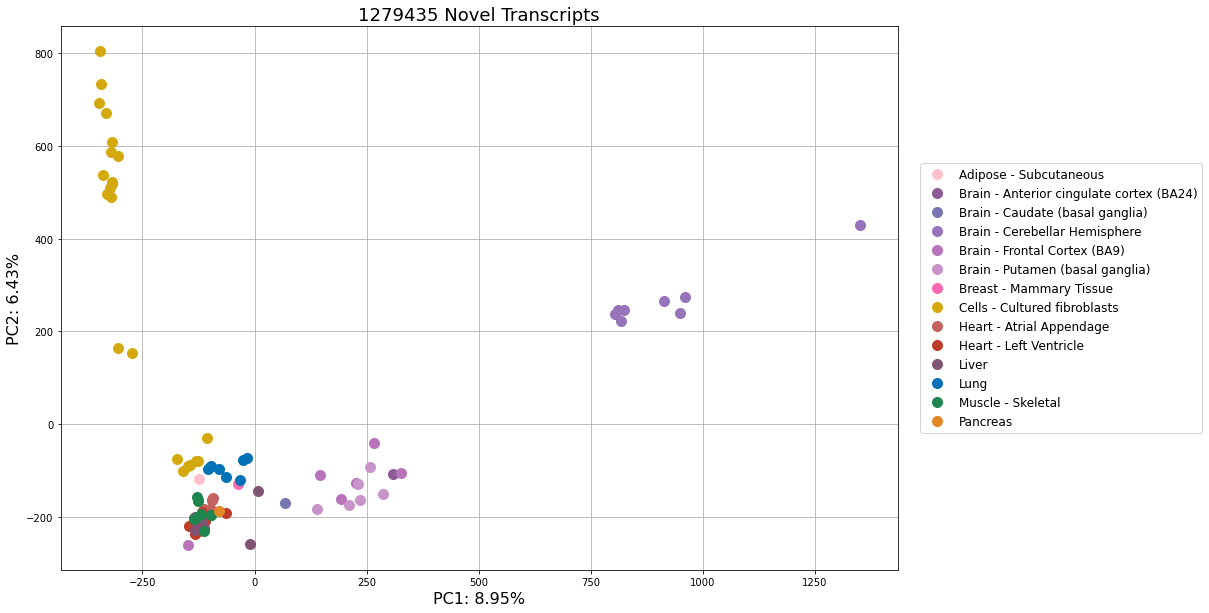

In [77]:
visualize_PCA(novel_transcript_express_tissue_clean,
              str(num_novel_transcripts)+' Novel Transcripts')

#### Filter Applied

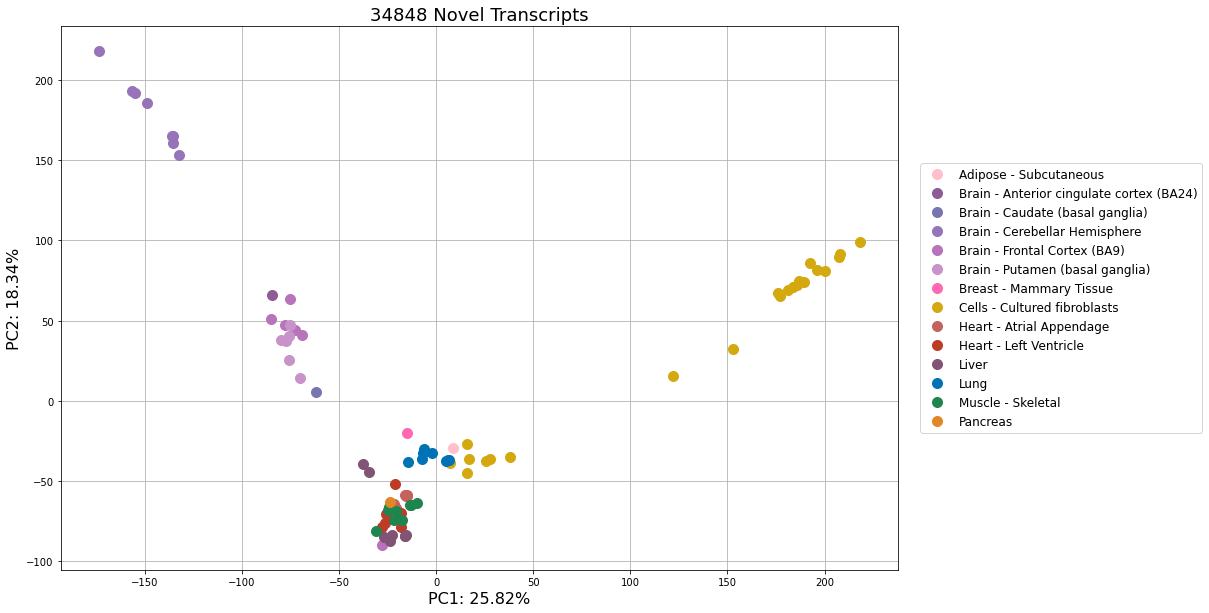

In [78]:
visualize_PCA(novel_transcript_express_tissue_clean_filtered,
              str(num_novel_filtered_transcripts)+' Novel Transcripts')

### Section 2: PCA of Annotated Transcript Expression

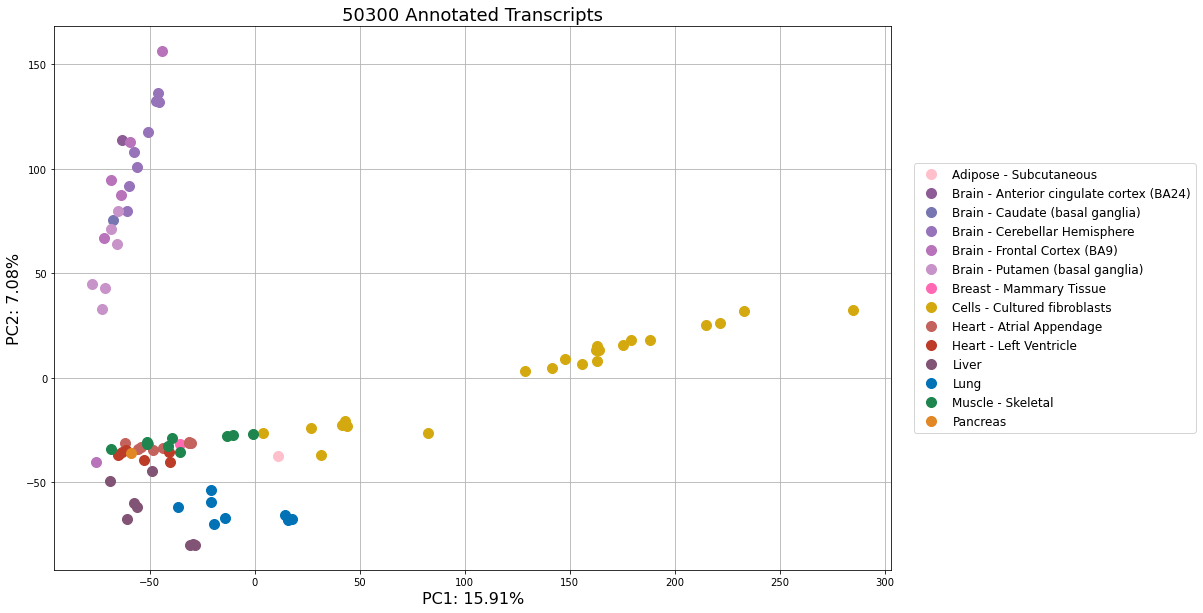

In [79]:
visualize_PCA(annotated_transcript_express_tissue_clean,
              str(num_annotated_transcripts)+' Annotated Transcripts')

#### Filter Applied

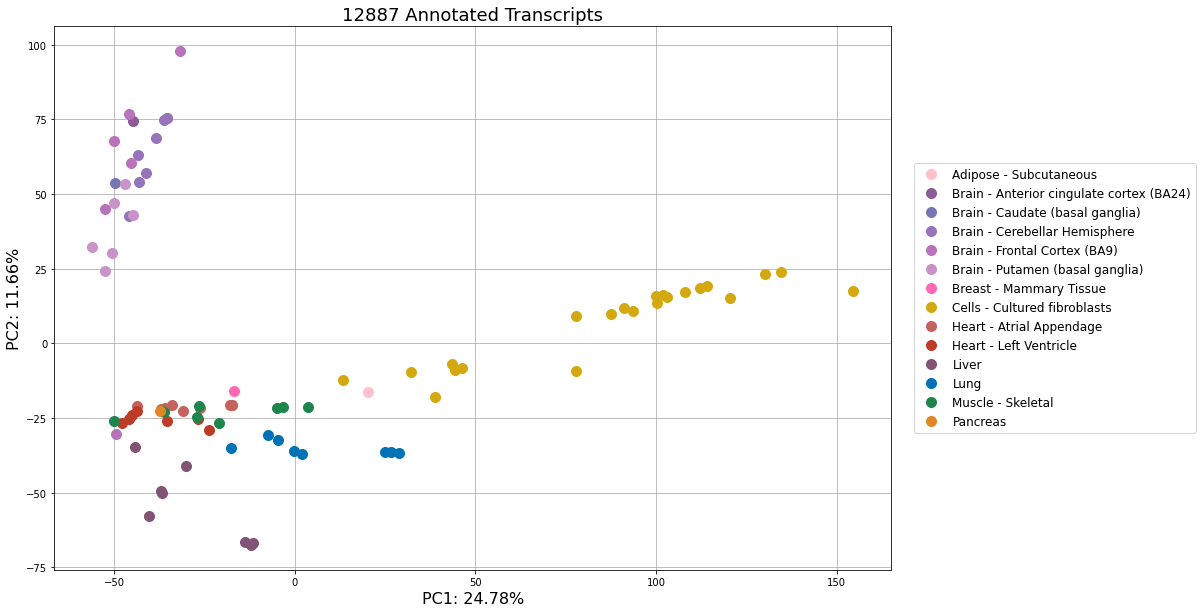

In [80]:
visualize_PCA(annotated_transcript_express_tissue_clean_filtered,
              str(num_annotated_filtered_transcripts)+' Annotated Transcripts')

### Section 3: Hierarchial Clustering of Novel Transcript Expression using Euclidean distance

In [81]:
def hierarchial_clustering_heatmap(df):
    '''
    Conduct correlation analysis and hierarchial clustering using Euclidean distance on the input dataframe.
    Generate a heatmap of Spearman correlation and dendrogram of hierarchial clustering.
    
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
    '''
    # remove sample id information
    df_hc = df.iloc[: , 1:]
    # transpose the dataframe
    df_hc = df_hc.transpose()
    # replace the header with the first row
    df_hc_header = df_hc.iloc[0] #grab the first row for the header
    df_hc= df_hc[1:] #remove first row from dataset
    df_hc.columns = df_hc_header #set the new header row
    # change data type from object to numeric
    df_hc = df_hc.astype('float')
    # calculate pairwise Spearman correlation between columns (tissue types)
    df_corr = df_hc.corr(method="spearman")
    # add color labels corresponding to different tissue types
    df_col_colors = df_corr.columns.map(color_dict)
    # create custom linkage using Eculidean distance metric
    df_linkage = hc.linkage(sp.distance.pdist(df_corr, metric='euclidean'), method='average')

    # create clustermap
    map_hc = sns.clustermap(df_corr, row_linkage=df_linkage, col_linkage=df_linkage, row_colors=df_col_colors,
                          col_colors=df_col_colors,cmap='BrBG',vmin=0,vmax=1,
                          yticklabels=False,xticklabels=False)
    # adjust axes label parameters
    map_ax = map_hc.ax_heatmap
    map_hc.ax_row_dendrogram.set_visible(False)
    # turn off x,y labels
    map_ax.set_ylabel('')    
    map_ax.set_xlabel('')
    # set colorbar position
    map_hc.cax.set_position([1, .15, .03, .6])
    # add legend for color labels (representing different tissue types)
    handles = [Patch(facecolor=color_dict[tissue_name]) for tissue_name in color_dict]
    plt.legend(handles, color_dict, title='Tissues',ncol=3, bbox_to_anchor=(0.5, 1.65), loc="best")
    
    # export figures
    # plt.savefig('flair_heatmap_novel_raw_counts.png',facecolor='w')
    # plt.savefig('flair_heatmap_annotated_raw_counts.png',facecolor='w')

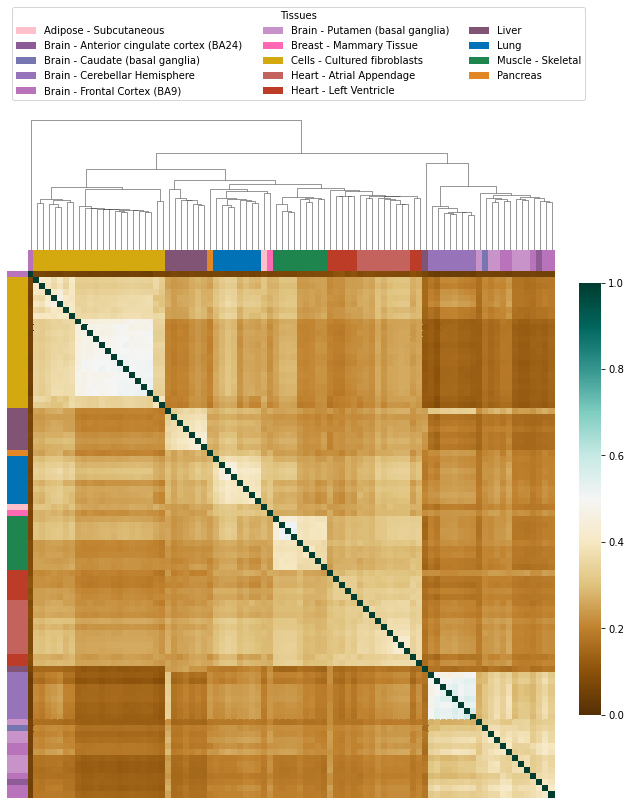

In [82]:
hierarchial_clustering_heatmap(novel_transcript_express_tissue_clean)

#### Filter Applied

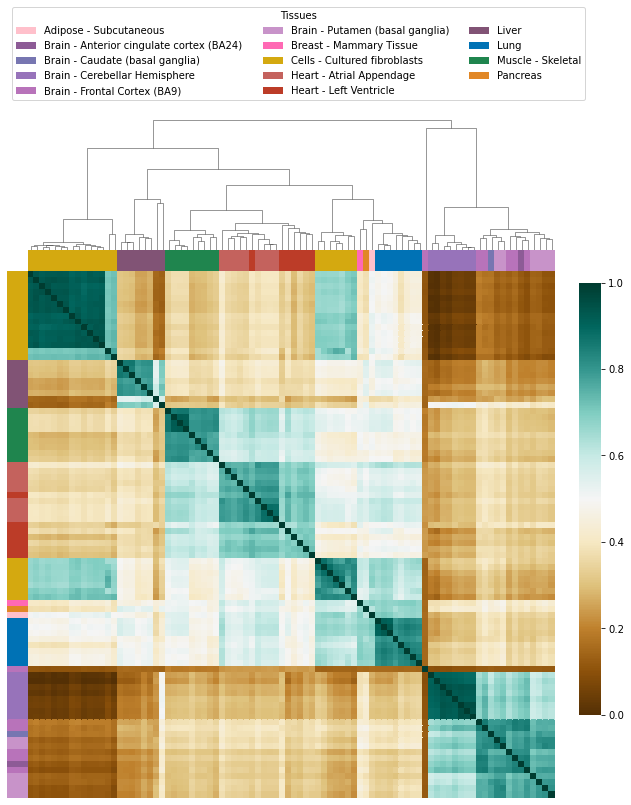

In [83]:
hierarchial_clustering_heatmap(novel_transcript_express_tissue_clean_filtered)

### Section 4: Hierarchial Clustering of Annotated Transcript Expression using Euclidean distance

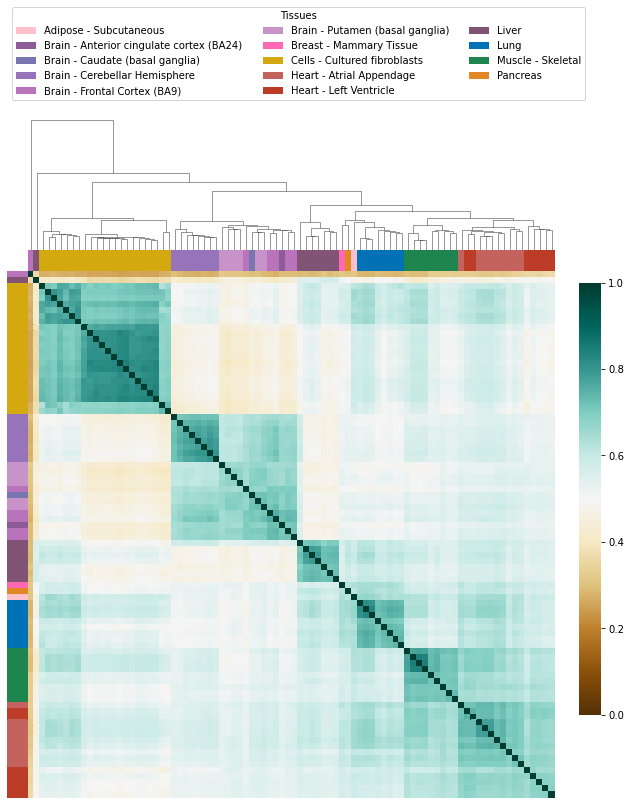

In [84]:
hierarchial_clustering_heatmap(annotated_transcript_express_tissue_clean)

#### Filter Applied

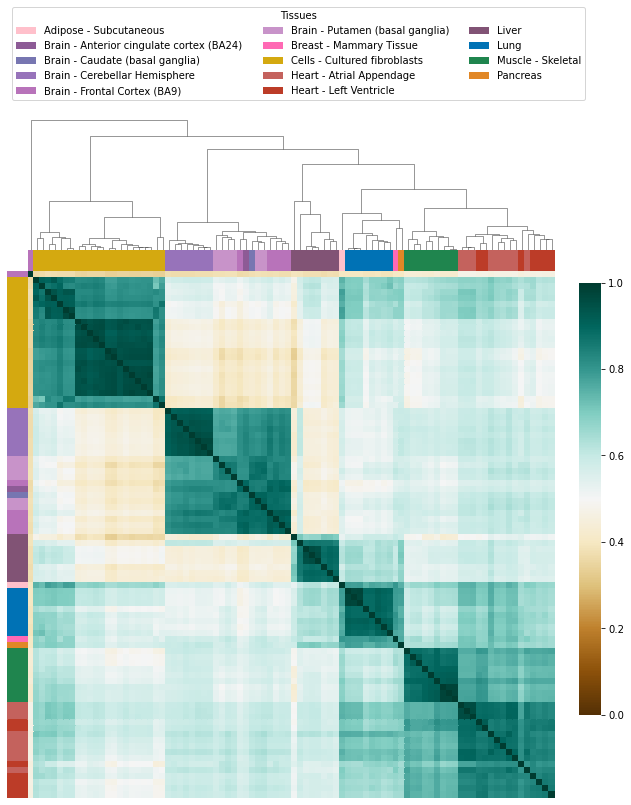

In [85]:
hierarchial_clustering_heatmap(annotated_transcript_express_tissue_clean_filtered)